# Problem Statement:
    
    
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [90]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [91]:
# checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [92]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# EDA

In [93]:
#Making binary classificaion for the response variable.
from sklearn.preprocessing import LabelEncoder

In [94]:
group = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = 2, labels = group)

In [95]:
label_quality = LabelEncoder()

In [96]:
#Bad becomes 0 and good becomes 1 

df['quality'] = label_quality.fit_transform(df['quality'])

In [97]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

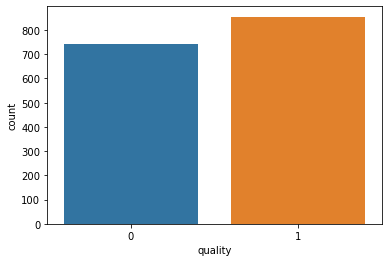

In [98]:
sns.countplot(df['quality'])

# Scatter Plot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

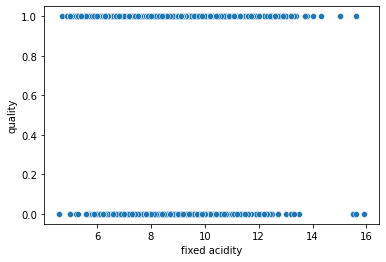

In [99]:
sns.scatterplot(x = 'fixed acidity', y= 'quality', data = df)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

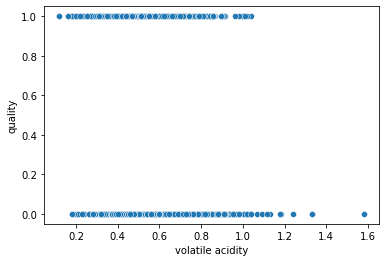

In [100]:
sns.scatterplot(x = 'volatile acidity', y = 'quality', data = df)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

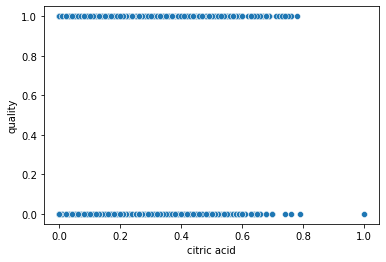

In [101]:
sns.scatterplot(x = 'citric acid', y ='quality', data = df)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

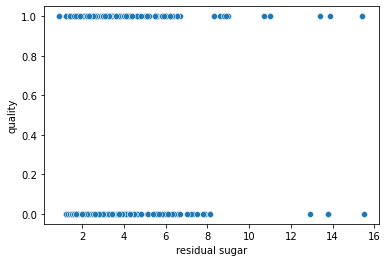

In [102]:
sns.scatterplot(x = 'residual sugar', y = 'quality', data = df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

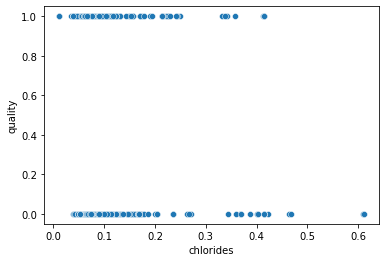

In [103]:
sns.scatterplot(x = 'chlorides', y ='quality', data = df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

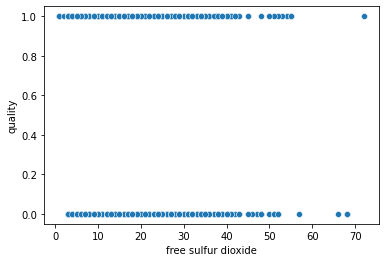

In [104]:
sns.scatterplot(x = 'free sulfur dioxide', y ='quality', data = df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

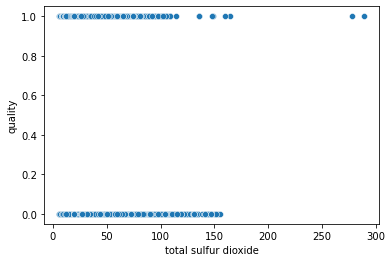

In [105]:
sns.scatterplot(x = 'total sulfur dioxide', y = 'quality', data = df)

<AxesSubplot:xlabel='density', ylabel='quality'>

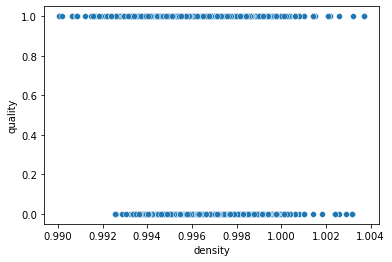

In [106]:
sns.scatterplot(x = 'density', y ='quality', data = df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

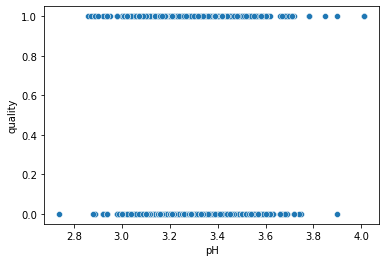

In [107]:
sns.scatterplot(x = 'pH', y='quality', data = df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

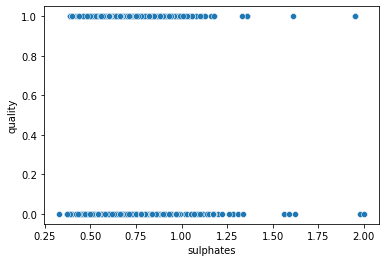

In [108]:
sns.scatterplot(x = 'sulphates', y ='quality', data = df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

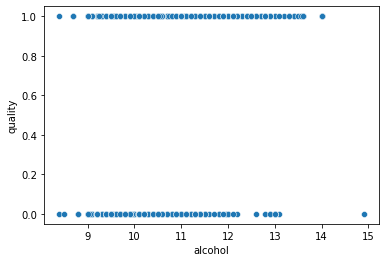

In [109]:
sns.scatterplot(x ='alcohol', y= 'quality', data = df)

# Correlation

In [110]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


<AxesSubplot:>

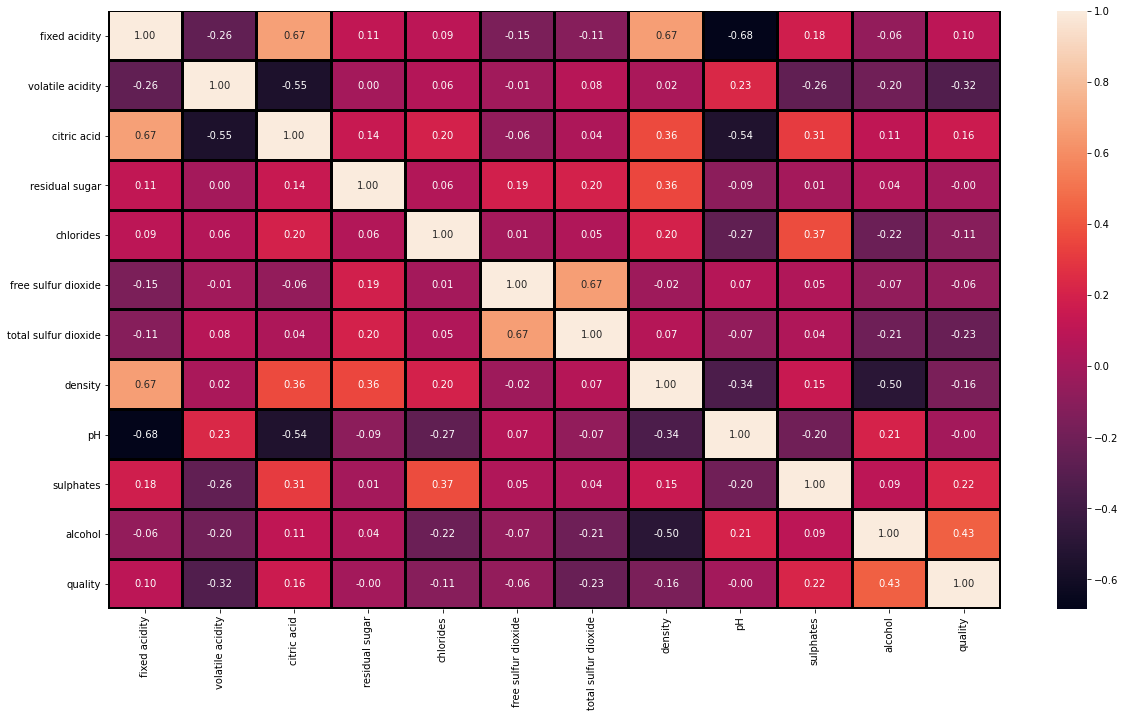

In [111]:
# using Heatmap
plt.figure(figsize = (20,11))
sns.heatmap(df.corr(), annot = True, linewidth = 2 , linecolor = 'black', fmt = '.2f')

# Outcome of Correlation

Fixed Acidity has 10 percent correlation with the target column which can be considered as a weak bond.

Volatile Acidity has 32 percent negative correlation with the target column which can be considered as a very poor bond.

Citric Acid has 16 percent correlation with the target column which can be considered as a good bond.

Residual Sugar has 0 percent negative correlation which can be considered as a weak bond.

Chlorides has 11 percent negative correlation which can be considered as a poor bond.

Free Sulfur dioxide has 6 percent negative correlation which can be considered as a poor bond.

Total Sulfur dioxide has 23 percent negative correlation which can be considered as a poor bond.

Density has 16 percent negative correlation which can be considered as a poor bond.

pH has 0 percent negative correlation which can be considered as a poor bond.

Sulphates has 22 percent correlation which can be considered as a good bond.

Alcohol has 43 percent correlation which can be considered as a strong bond.

Max Correlation:- Alcohol

Min Correlation:- Volatile Acidity

# Describing Dataset

In [112]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


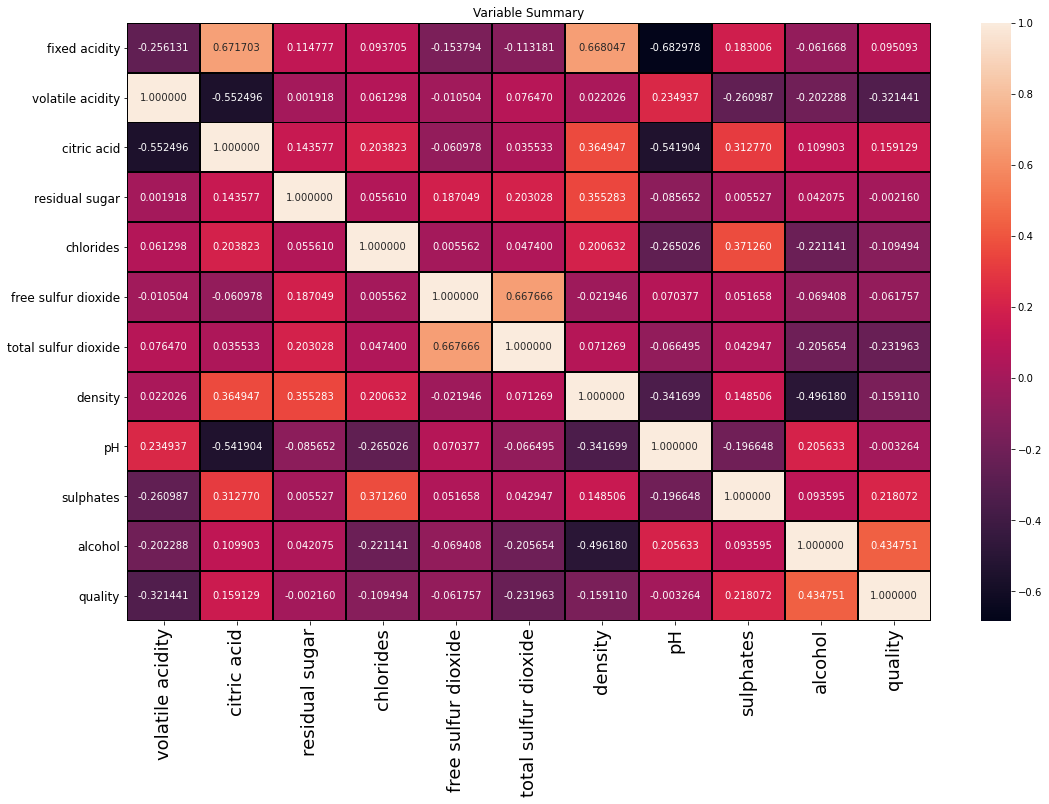

In [113]:
plt.figure(figsize= (18,11))
sns.heatmap(df.corr()[1:].transpose(), annot = True, linewidth = 1, linecolor = 'black', fmt = 'f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Variable Summary")
plt.show()

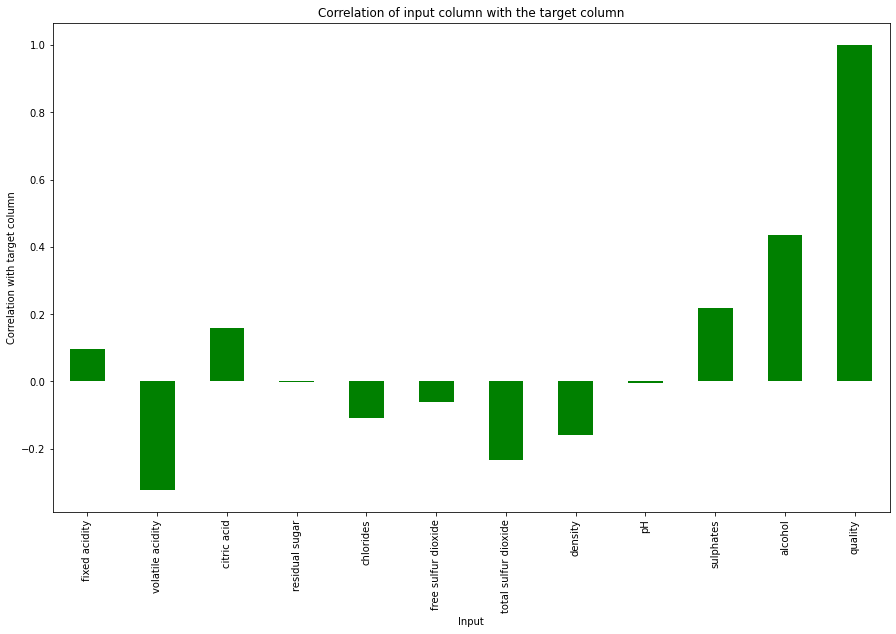

In [114]:
plt.figure(figsize = (15,9))
df.corr()['quality'].plot(kind = 'bar' , color ='g')
plt.xlabel('Input')
plt.ylabel('Correlation with target column')
plt.title("Correlation of input column with the target column")
plt.show()


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


In [116]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

# Checking Outliers

<AxesSubplot:>

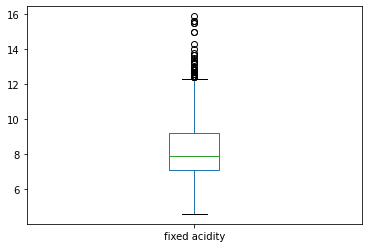

In [117]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

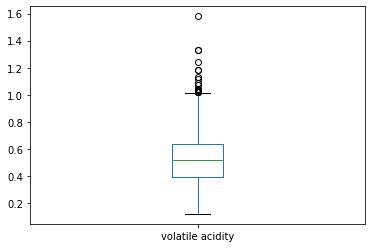

In [118]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

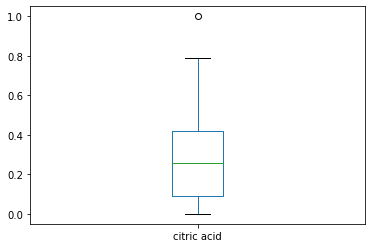

In [119]:
df['citric acid'].plot.box()

<AxesSubplot:>

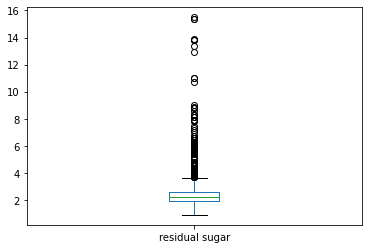

In [120]:
df['residual sugar'].plot.box()

<AxesSubplot:>

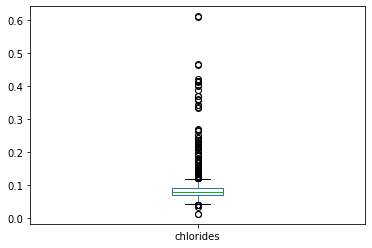

In [121]:
df['chlorides'].plot.box()

<AxesSubplot:>

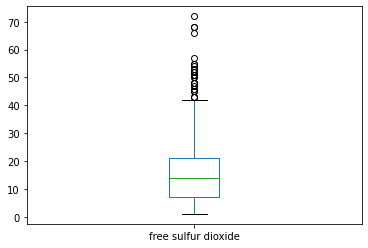

In [122]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

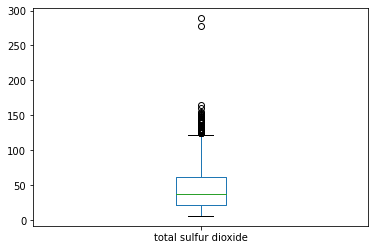

In [123]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

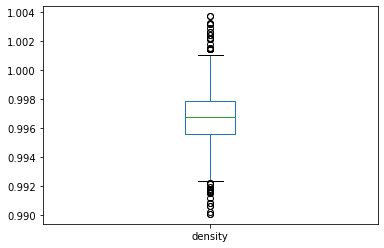

In [124]:
df['density'].plot.box()

<AxesSubplot:>

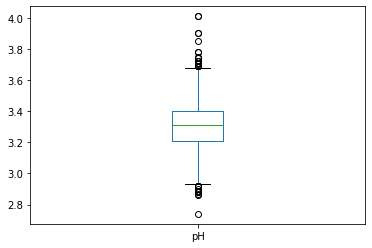

In [125]:
df['pH'].plot.box()

<AxesSubplot:>

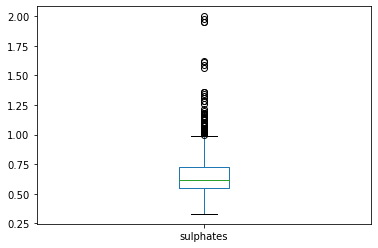

In [126]:
df['sulphates'].plot.box()

<AxesSubplot:>

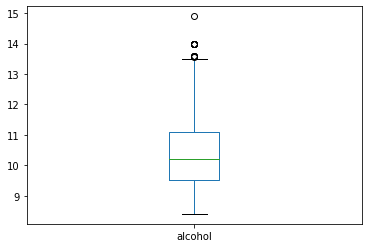

In [127]:
df['alcohol'].plot.box()

<AxesSubplot:>

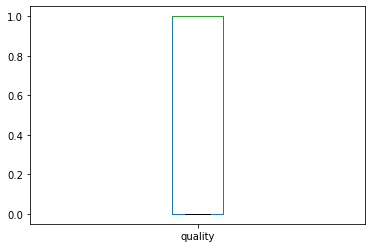

In [128]:
df['quality'].plot.box()

Check the percentage of data falls under outliers:

In [129]:
from scipy.stats import zscore
z =np.abs(zscore(df))
threshold =3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [130]:
df_new = df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [131]:
df.shape

(1599, 12)

# Percent Loss of data while removing outliers:

In [132]:
percentage_loss = (148/1599)*100
percentage_loss

9.255784865540964

# Here we have 9 percent data loss while removing outliers

In [133]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

# Removing Skewness

In [134]:
from sklearn.preprocessing import power_transform
x = power_transform(x , method = 'yeo-johnson')

In [135]:
x

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

# Model Building

In [136]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 61 The model performs very well
Random_state:- 61
Training r2_score is:- 74.01372212692966
Testing r2_score is:- 73.97260273972603
At random state 122 The model performs very well
Random_state:- 122
Training r2_score is:- 74.01372212692966
Testing r2_score is:- 73.97260273972603
At random state 152 The model performs very well
Random_state:- 152
Training r2_score is:- 74.27101200686106
Testing r2_score is:- 74.31506849315068
At random state 258 The model performs very well
Random_state:- 258
Training r2_score is:- 74.01372212692966
Testing r2_score is:- 73.97260273972603
At random state 383 The model performs very well
Random_state:- 383
Training r2_score is:- 74.01372212692966
Testing r2_score is:- 73.97260273972603
At random state 423 The model performs very well
Random_state:- 423
Training r2_score is:- 74.01372212692966
Testing r2_score is:- 73.97260273972603
At random state 435 The model performs very well
Random_state:- 435
Training r2_score is:- 73.58490566037736

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 841)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45       125
           1       0.58      0.54      0.56       167

    accuracy                           0.51       292
   macro avg       0.51      0.51      0.50       292
weighted avg       0.52      0.51      0.51       292



# Cross validation score for logistic regression:

In [148]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 69.89026063100137
accuracy_score is:- 75.0


At cv:- 3
Cross validation score is:- 71.46776406035666
accuracy_score is:- 75.0


At cv:- 4
Cross validation score is:- 72.43131868131869
accuracy_score is:- 75.0


At cv:- 5
Cross validation score is:- 71.60547003718872
accuracy_score is:- 75.0


At cv:- 6
Cross validation score is:- 71.87928669410151
accuracy_score is:- 75.0


At cv:- 7
Cross validation score is:- 71.60898312214101
accuracy_score is:- 75.0


At cv:- 8
Cross validation score is:- 72.77480033627575
accuracy_score is:- 75.0


At cv:- 9
Cross validation score is:- 71.94787379972564
accuracy_score is:- 75.0




In [149]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.7243131868131868 
The accuracy score is:  0.75


In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

In [151]:

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0,shuffle=True)
    cv_result = cross_val_score(model,x_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Naive Bayes: 74.53580901856763
K-Nearest Neighbour: 70.58944886531093
Decision Tree: 73.41659298555851
Support Vector Machine-linear: 73.58532272325375
Support Vector Machine-rbf: 75.21956970232833
Random Forest: 77.01738874152669
MLP: 74.35676392572945
AdaBoostClassifier: 72.72914824638963
GradientBoostingClassifier: 76.58782788093134


Best Model is random forest

# AUC ROC Curve

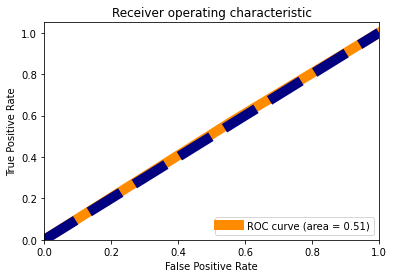

In [152]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

In [143]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_test))

[[71 79]
 [65 77]]


# Model Saving:

In [144]:
import pickle
filename = 'redwine_quality.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [145]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
df_com

,original,predicted
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
287,0,0
288,0,0
289,0,1
290,0,0
